# Обнаружение мошеннических операций с кредитными картами


### Описание:

Мошенничество с кредитными картами представляет собой случаи несанкционированного использования чужих кредитных карт для осуществления финансовых операций без ведома их законных владельцев.

С развитием электронной коммерции и стремительным ростом популярности OTT-платформ в период пандемии COVID-19, объёмы использования кредитных карт возросли в геометрической прогрессии. Вместе с этим пропорционально увеличилось и число случаев мошенничества. В современном мире автоматизация обнаружения мошеннических транзакций становится насущной необходимостью, а методы машинного обучения служат инструментом для эффективного противодействия этим преступлениям.



- **V1 - V28** : числовые признаки, являющиеся результатом преобразования PCA.

- **Time** : секунды, прошедшие между каждой транзакцией и первой транзакцией.

- **Amount** : сумма транзакции.

- **Class** : мошенничество или нет (1 или 0).

### Содержание:
- Информация о наборе данных
- Визуализация данных
- Выбор признаков
- Балансировка данных
- Моделирование
- Заключение

# Информация о наборе данных

### Импорт библиотек

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [8]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum().sum()

0

В данных отсутсвуют пустые значения

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


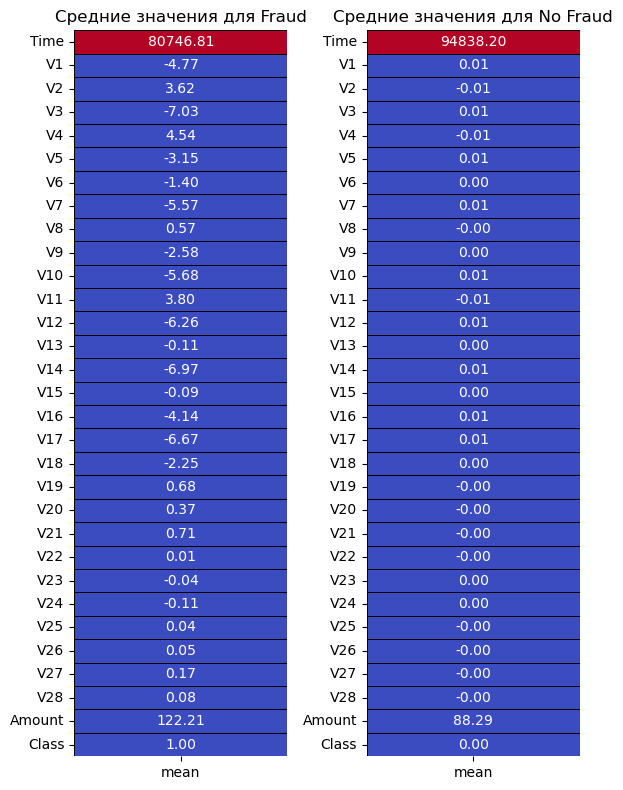

In [13]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 8))

plt.subplot(1, 2, 1)
sns.heatmap(fraud[['mean']], annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Средние значения для Fraud', fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(nofraud[['mean']], annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=False, fmt='.2f')
plt.title('Средние значения для No Fraud', fontsize=12)

fig.tight_layout()
plt.show()

**Средние** значения признаков для случаев **Мошеннических транзакций** и **Обычных транзакций**:
- Почти для всех случаев **Обычных транзакций** средние значения **V1 - V28** близки к **0**. Средняя **сумма**, 88.29, меньше средней суммы **Мошеннических транзакций**, которая равна 122.21.
- **Время**, затраченное на транзакции **без мошенничества**, больше, чем на транзакции **с мошенничеством**.

Таким образом, это может быть одним из показателей для выявления **мошеннических операций**.

# Визуализация данных

### Визуализация целевых переменны (Class) : 

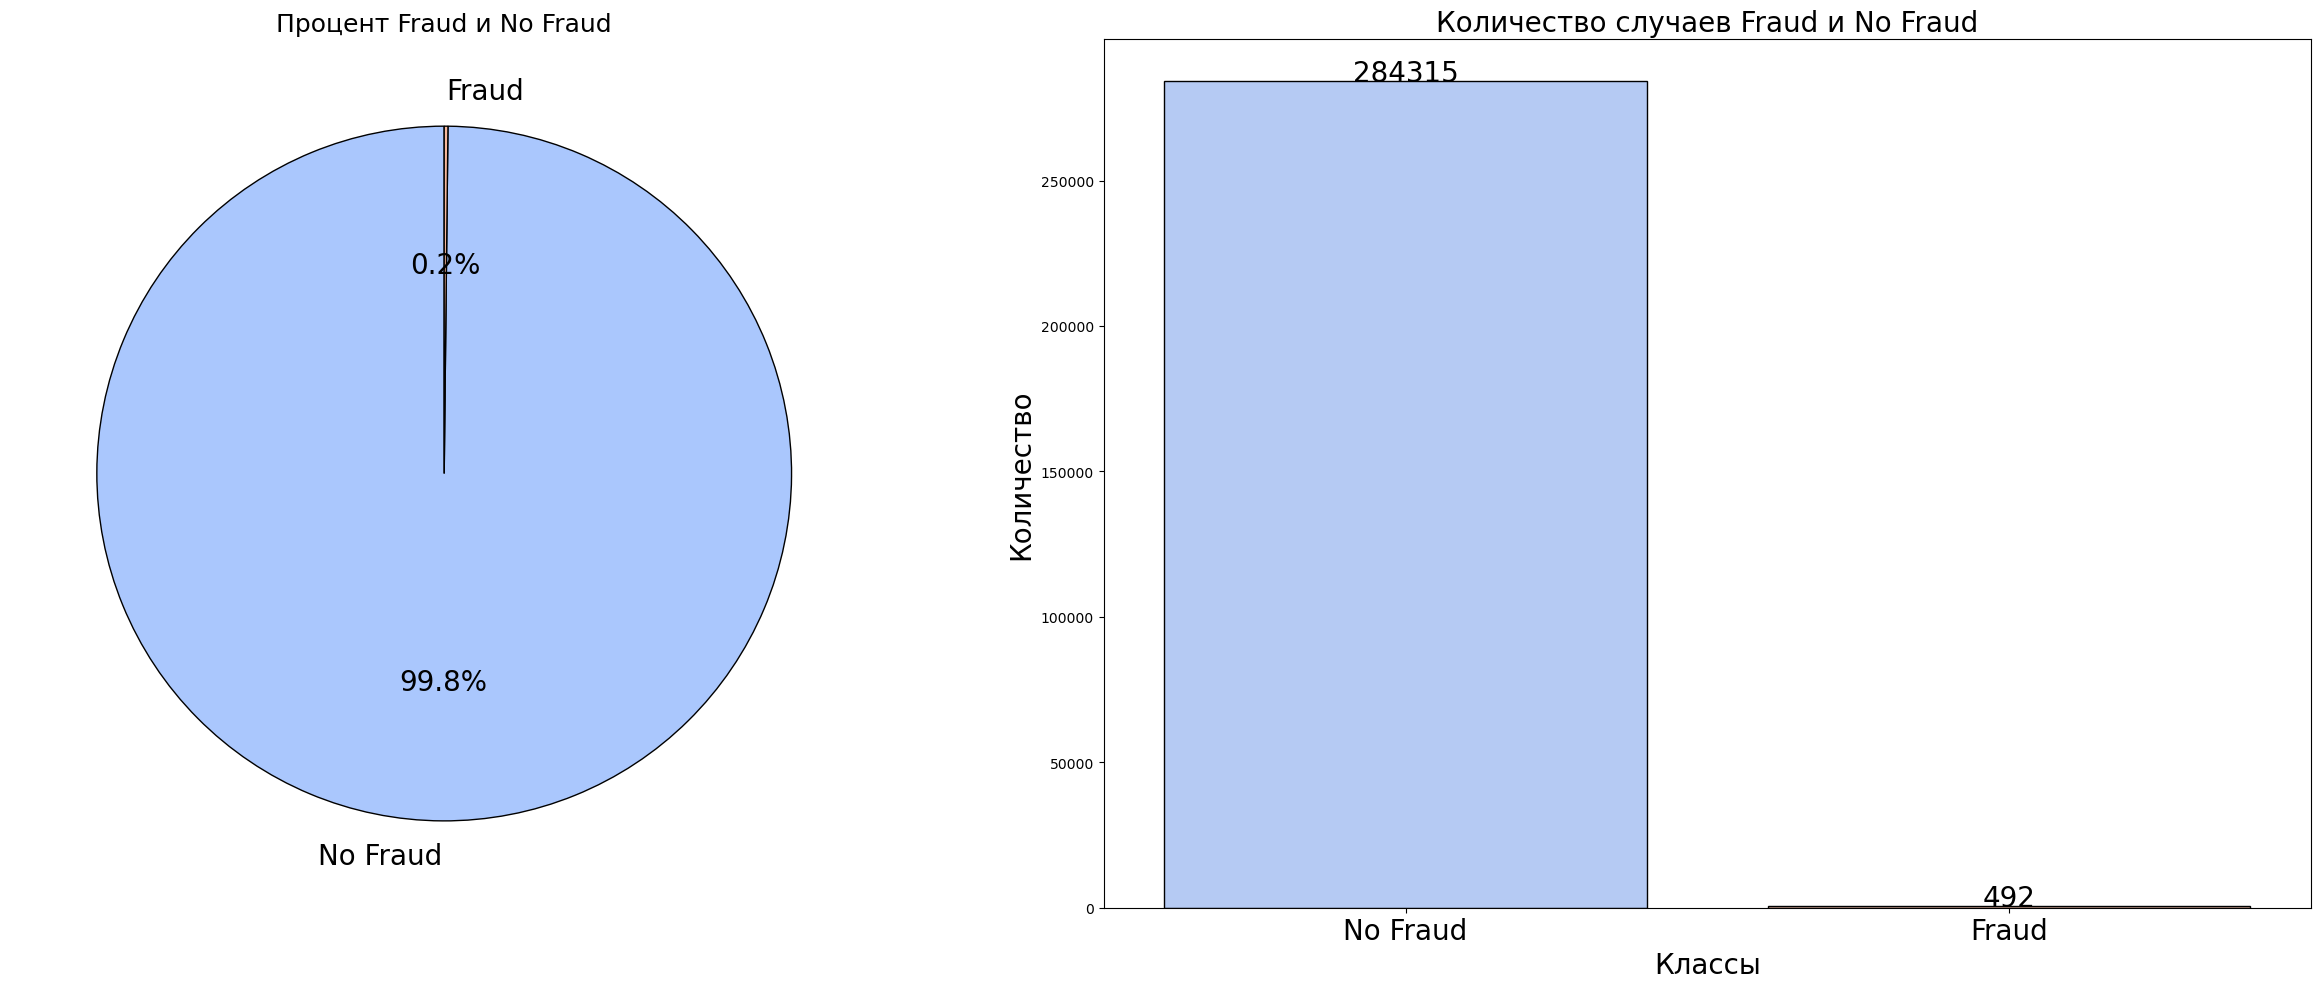

In [17]:
fraud_percentage = data['Class'].value_counts(normalize=True) * 100
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Круговая диаграмма
axes[0].pie(fraud_percentage, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette("coolwarm", 2), 
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
            textprops={'fontsize': 20})
axes[0].set_title('Процент Fraud и No Fraud', fontsize=18)

# Гистограмма
sns.countplot(x='Class', data=data, edgecolor='black', palette="coolwarm", hue='Class', 
              legend=False, ax=axes[1])
for rect in axes[1].patches:
    axes[1].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 8,
                 int(rect.get_height()), horizontalalignment='center', fontsize=20)
axes[1].set_xticks([0, 1])  # Устанавливаем фиксированные позиции для меток
axes[1].set_xticklabels(['No Fraud', 'Fraud'], fontsize=20)
axes[1].set_title('Количество случаев Fraud и No Fraud', fontsize=20)
axes[1].set_ylabel('Количество', fontsize=20)
axes[1].set_xlabel('Классы', fontsize=20)

plt.tight_layout()
plt.show()

- Данные явно **несбалансированные**, так как большинство транзакций - **обычные**. 
- Из-за высокой несбалансированности данных модель классификации будет смещать свои предсказания в сторону класса большинства. 
- Таким образом, балансировка данных становится важнейшей частью построения надежной модели. 

# Выбор признаков

### Матрица корреляции

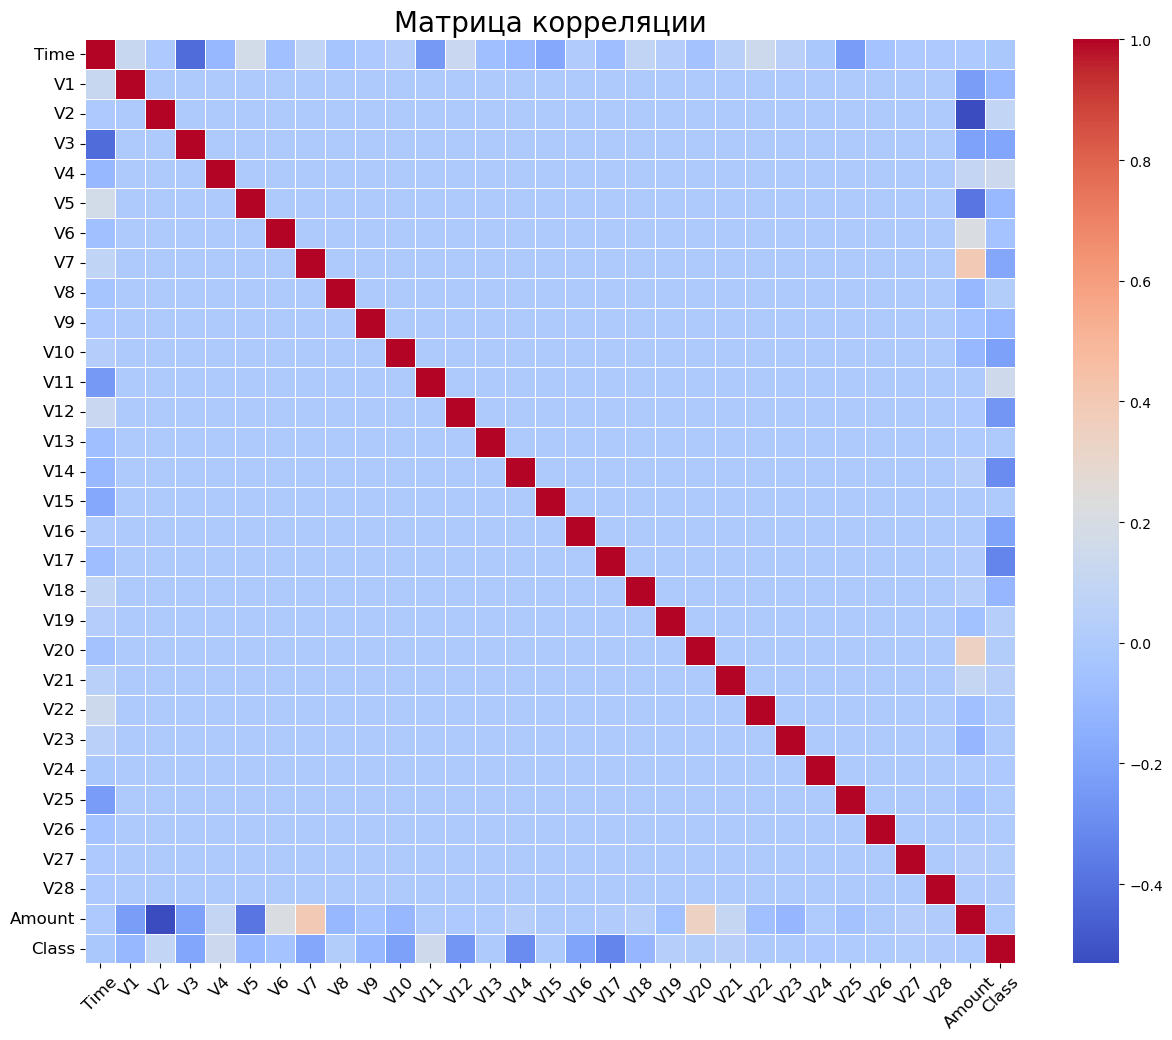

In [21]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, cbar=True)

plt.title("Матрица корреляции", fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

В наборе данных слишком много признаков, поэтому понять что-либо сложно. Исходя из этого мы построим карту корреляции только с целевой переменной.

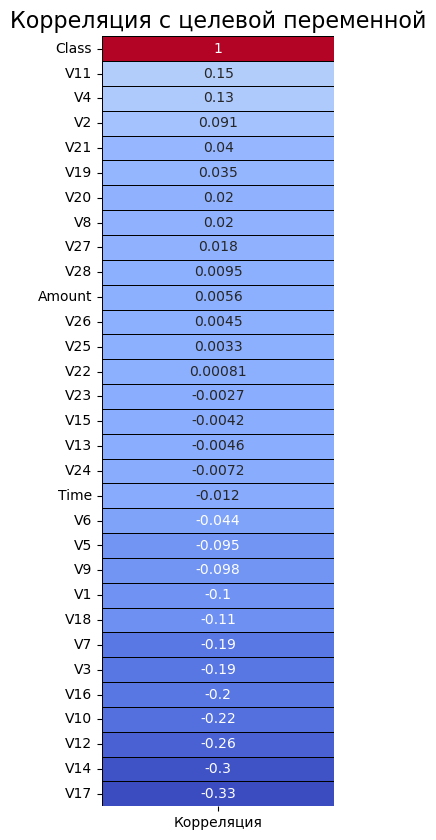

In [23]:
corr = data.corrwith(data['Class']).sort_values(ascending=False).to_frame()
corr.columns = ['Корреляция']

plt.figure(figsize=(3, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.4, linecolor='black', cbar=False)
plt.title('Корреляция с целевой переменной', fontsize=16)
plt.show()

Для отбора признаков мы исключим признаки, имеющие значения корреляции между **[-0.1,0.1]**.

Тогда останутся **V4**, **V11**, которые коррелируются положительно, и **V18**, **V7**, **V3**, **V16**, **V10**, **V12**, **V14**, **V17** коррелируются отрицательно с целевой переменной.

### Дисперсионный анализ (ANOVA):

Дисперсионный анализ (ANOVA) - это статистический метод, используемый для определения наличия статистически значимых различий между средними значениями нескольких групп.

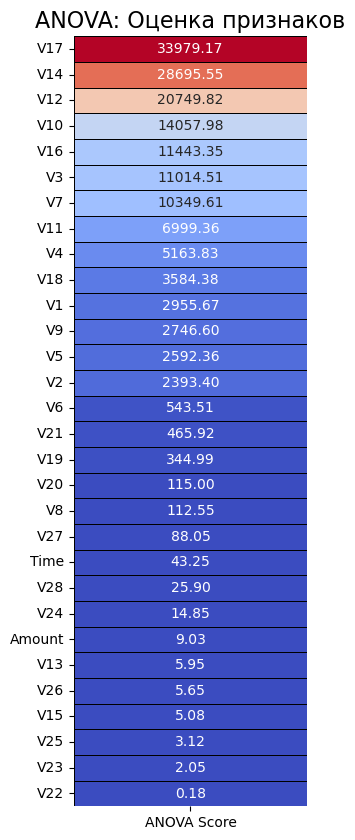

In [27]:
features = data.loc[:, :'Amount']
target = data.loc[:, 'Class']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
featureScores = featureScores.sort_values(ascending=False, by='ANOVA Score')

plt.figure(figsize=(3, 10))
sns.heatmap(featureScores, annot=True, cmap="coolwarm", linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('ANOVA: Оценка признаков', fontsize=16)
plt.show()

Чем больше значение показателя ANOVA, тем выше значимость этого признака для целевой переменной. Исходя из полученных выше данных - отбросим признаки со значениями менее 50.

-В этом случае мы создадим 2 датафрейма на основе признаков, выбранных из полученной корреляции данных и целевой переменной и балла ANOVA.

#### Набор данных для модели, основанной на корреляции

In [30]:
df_CR = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18','Class']].copy(deep = True)
df_CR.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


#### Набор данных для модели на основе оценки ANOVA

In [32]:
df_ANOVA = data.copy(deep = True)
df_ANOVA.drop(columns = list(featureScores.index[20:]),inplace = True)
df_ANOVA.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


# Балансировка данных

Для балансировки данных используется два основных подхода: Undersampling и Oversampling.

При использовании Undersampling количество образцов мажоритарного класса уменьшается до размера миноритарного класса. Этот подход уменьшает размер набора данных, что приводит к ускорению обучения, но может привести к потере важной информации. С другой стороны, Oversampling увеличивает количество образцов класса меньшинства за счет дублирования существующих данных или создания синтетических данных (например, с помощью SMOTE). Это позволяет увеличить класс меньшинства без отбрасывания данных, но может увеличить риск overfitting (когда модель слишком точно запоминает обучающие данные и плохо работает на новых), если данные просто дублируются.

Лучших результатов часто можно добиться, комбинируя оба подхода. Сначала следует уменьшить выборку доминирующего класса, чтобы уменьшить его размер, а затем увеличить выборку миноритарного класса, чтобы она соответствовала мажоритарному классу.


#### Балансировка данных для модели на основе корреляции

In [36]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df_CR.iloc[:,:10].values
t1 = df_CR.iloc[:,10].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

#### Балансировка данных для модели на основе оценки ANOVA

In [38]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df_ANOVA.iloc[:,:20].values
t2 = df_ANOVA.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

### Расчет для балансировки данных :

**Sampling Strategy** : Это соотношение, которое является общим параметром для переборки и недоборки.

**Sampling Strategy** : **( Образцы класса меньшинства) / ( Образцы класса большинства)**.

**В данном случае:**

- Класс большинства - обычные транзакции: 284315
- Класс меньшинства - мошеннические транзакции: 492 


### Undersampling

Sampling_Strategy = 0,1

0,1 = ( 492 ) / класса большинства

Получим:

- Класс большинства - обычные транзакции: 4920 образцов
- Класс меньшинства - мошеннические транзакции: 492 образца


### Oversampling

- Sampling_Strategy = 0,5
- 0,5 = ( Образцы класса меньшинств ) / 4920

Получим: 

- Класс большинства - обычные транзакции: 4920 образцов
- Класс меньшинства - мошеннические транзакции: 2460 образцов
    

Итоговые выборки:

- Класс большинства - обычные транзакции: 4920 образцов
- Класс меньшинства - мошеннические транзакции: 2460 образцов


Для несбалансированных наборов данные дублируются, чтобы устранить потенциальную погрешность в прогнозах.

Благодаря этому процессу дублирования используются синтетические данные для целей моделирования, чтобы убедиться, что прогнозы не перекошены в сторону большинства значений целевой переменной.

Таким образом, оценка моделей с помощью **accuracy** будет вводить в заблуждение. Вместо этого для оценки моделей необходимо использовать **confusion matrix, ROC-AUC graph and ROC-AUC score**.

# Моделирование

In [41]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

Делим данные на группы обучения и тестирования (80/20)

In [43]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    
    prediction = classifier.predict(x_test)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation Score", '{0:.2%}'.format(cv_score))
    
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc))
    
    RocCurveDisplay.from_estimator(classifier, x_test, y_test, color = "Purple")
    plt.title('График ROC-AUC')
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.show()


def model_evaluation(classifier, x_test, y_test):

    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot=labels, cmap='Purples', fmt='', cbar=False)
    plt.title('Матрица ошибок')
    plt.show()
    
    print(classification_report(y_test, classifier.predict(x_test)))


### Logistic Regression :

In [45]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Модель на основе корреляции

Cross Validation Score 98.30%
ROC_AUC Score: 97.96%


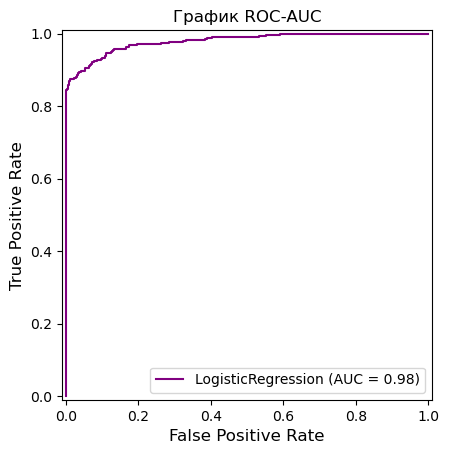

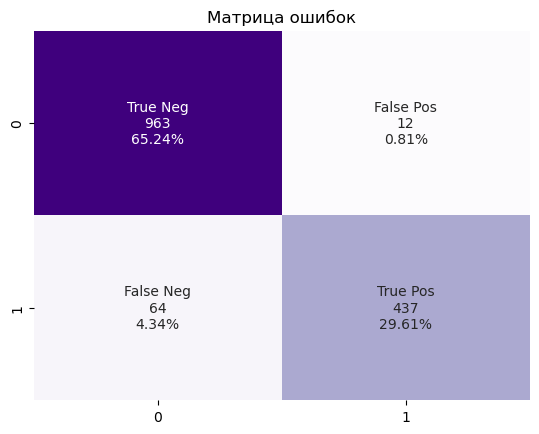

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [47]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Модель на основе оценки ANOVA

Cross Validation Score 98.73%
ROC_AUC Score: 98.52%


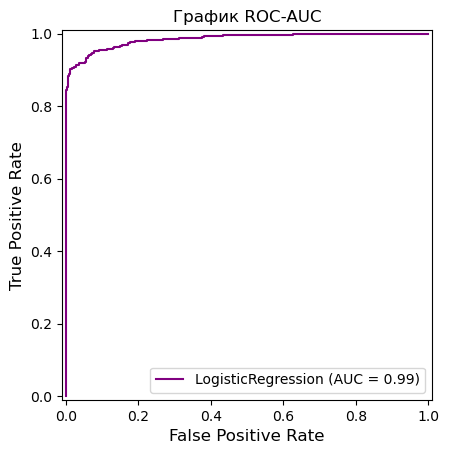

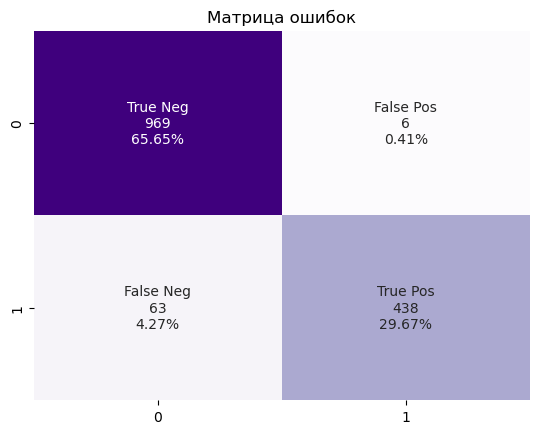

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.99      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.95      1476
weighted avg       0.96      0.95      0.95      1476



In [49]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### Support Vector Classifier

In [51]:
classifier_svc = SVC(probability=True,kernel = 'linear',C = 0.1)

#### Модель на основе корреляции

Cross Validation Score 98.28%
ROC_AUC Score: 97.90%


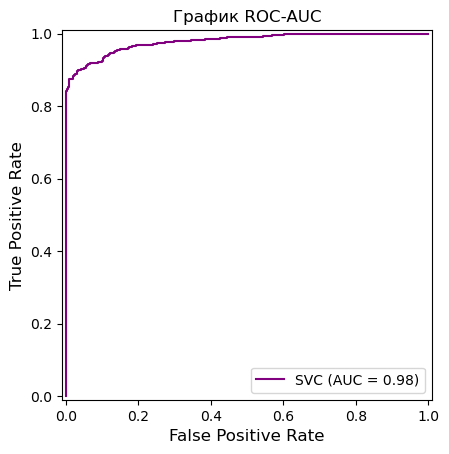

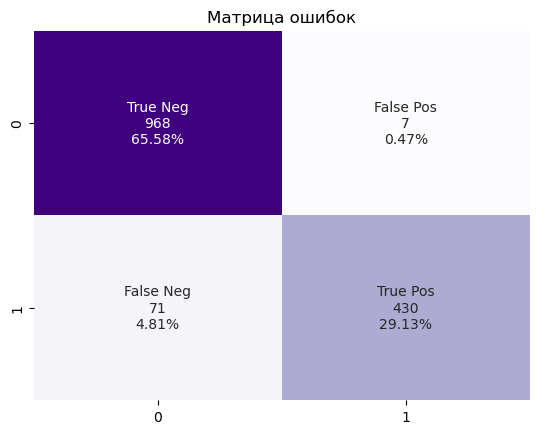

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [53]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Модель на основе оценки ANOVA

Cross Validation Score 98.51%
ROC_AUC Score: 98.20%


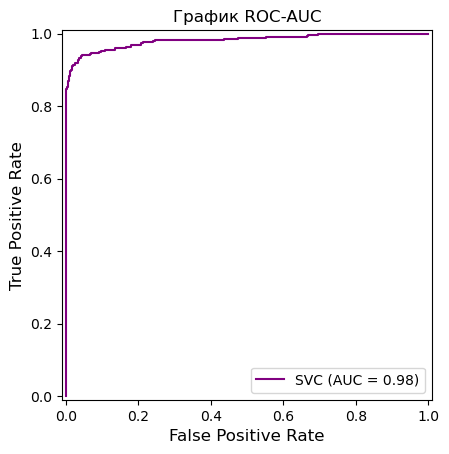

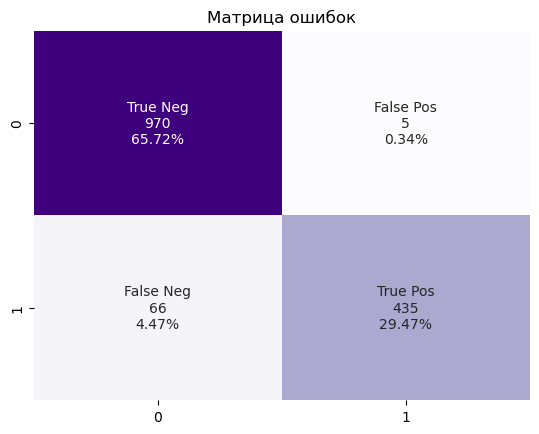

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.99      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [55]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### Random Forest Classifier

In [57]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### Модель на основе корреляции

Cross Validation Score 98.01%
ROC_AUC Score: 97.67%


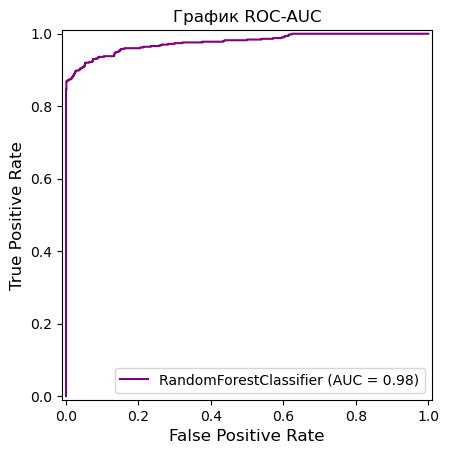

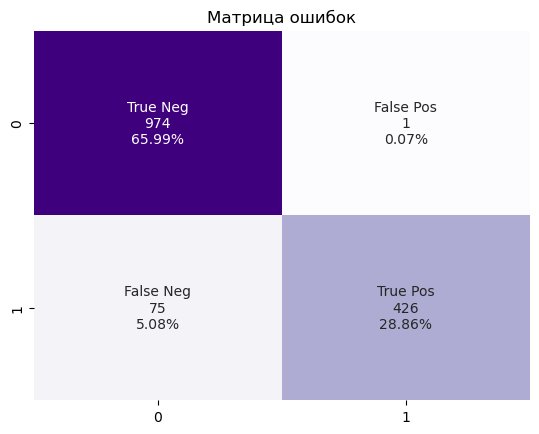

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.85      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [59]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### Модель на основе оценки ANOVA

Cross Validation Score 98.28%
ROC_AUC Score: 98.21%


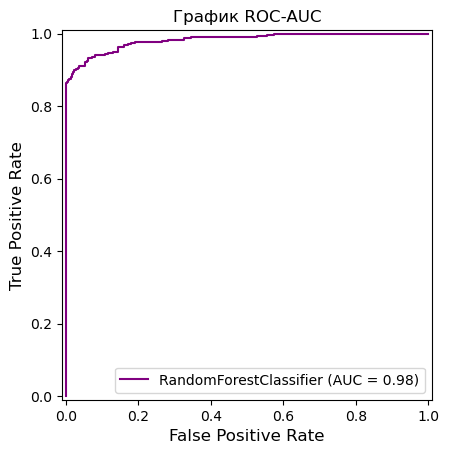

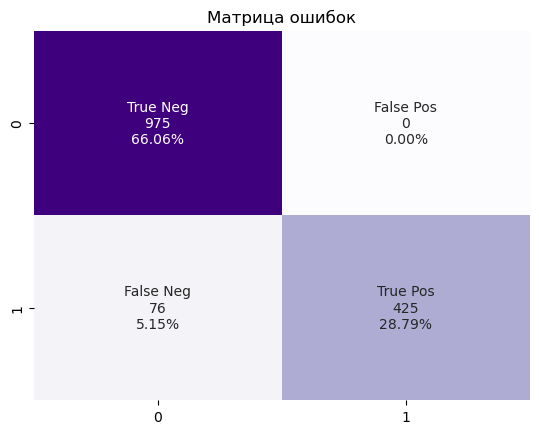

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       975
           1       1.00      0.85      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.92      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [61]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### Таблица результатов

#### Таблица результатов для моделей, основанных на корреляции 

|   |Алгоритм|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.30%|97.96%|92%|
|2|Support Vector Classifier|98.28%|97.90%|92%|
|3|Random Forest Classifier|98.01%|97.67%|92%|
 
#### Таблица результатов для моделей, основанных на оценки ANOVA

|   |Алгоритм|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.73%|98.52%|93%|
|2|Support Vector Classifier|98.51%|98.20%|92%|
|4|Random Forest Classifier|98.28%|98.21%|92%|

# Заключение
В данной работе были разработаны и оценены модели машинного обучения для выявления мошеннических транзакций. Оценка проводилась на основе двух методов отбора признаков: корреляционного анализа и ANOVA. Результаты анализа показали ключевые различия в производительности моделей в зависимости от подхода к выбору признаков.

Для моделей, построенных на основе корреляционной диаграммы, Логистическая регрессия продемонстрировала наилучший баланс по всем метрикам, получив оценку сross-validation score 98.30% и ROC AUC Score 97.96% и F1-score для класса Fraud 92%, что свидетельствует о высокой способности различать классы. Классификатор опорных векторов также показал достойные результаты с cross-validation score 98.28% и ROC AUC score 97.90%, F1-score остался на уровне 92%. Модель Random Forest Classifier продемонстрировала несколько более низкие показатели: cross-validation score 98.01%, ROC AUC score 97.67%, и также F1-score 92%, как и другие модели.

Для моделей, основанных на оценке ANOVA, логистическая регрессия снова оказалась самой эффективной моделью, получив оценку cross-validation score 98.73%, ROC AUC score 98.52% и F1-score для класса Fraud 93%. Классификатор опорных векторов достиг cross-validation score 98.51% и ROC AUC score 98.20%, а его F1-score составил 92%. Модель Random Forest Classifier продемонстрировала cross-validation score 98.28%, ROC AUC score 98.21% и F1-score 92%. Это говорит о том, что логистическая регрессия сохраняет свою устойчивость к различным методам отбора признаков.

Результаты показали, что модели, построенные на основе ANOVA, продемонстрировали небольшое улучшение по всем метрикам по сравнению с моделями на основе корреляционного анализа. Логистическая регрессия оказалась наиболее стабильной и эффективной моделью из рассмотренных при использовании обоих методов отбора признаков, что делает ее надежным выбором для обнаружения мошенничества.

Для задач, требующих быстрого и точного обнаружения мошенничества, рекомендуется использовать логистическую регрессию благодаря ее превосходному балансу по всем метрикам. Для более сложных наборов данных или сценариев, в которых минимизация ложных срабатываний имеет решающее значение, можно использовать классификатор опорных векторов (SVC). Кроме того, классификатор Random Forest может быть полезен для интерпретации важности признаков.

В заключение следует отметить, что данный анализ подчеркивает важность методов выбора признаков и алгоритмов классификации для повышения качества обнаружения мошенничества.
